# Problem Understanding

RFM analysis is a powerful technique used by companies to better understand customer behaviour and optimize engagement strategies. It revolves around three key dimensions: 

1. Recency 
2. Frequency
3. Monetary value

These dimensions capture essential aspects of customer transactions, providing valuable information for segmentation and personalized marketing campaigns.

# Data Understanding

The given dataset is provided by an e-commerce platform containing customer transaction data including customer ID, purchase date, transaction amount, product information, ID command and location. The platform aims to leverage RFM (recency, frequency, monetary value) analysis to segment customers and optimize customer engagement strategies.

# Objective

Your task is to perform RFM analysis and develop customer segments based on their RFM scores. 
The analysis should provide insights into:

- Customer behaviour 
- Identification of:
  -  High-value customers
  -  At-risk customers
- Potential opportunities for personalized marketing campaigns.

# Import Libraries and Data

In [ ]:
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn
import seaborn as sns

# Plotly
import plotly.express as px
import plotly.graph_objects as go

In [1]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings

%matplotlib inline

In [2]:
plt.style.use('ggplot')

warnings.filterwarnings('ignore')

In [3]:
# Import data
data = pd.read_csv(r"C:\Users\nick\OneDrive\Desktop\Code\rfm_analysis\Data\rfm_data.csv")

# View top 5 data
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [4]:
# View bottom 5 data
data.tail()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris
999,4759,2023-06-10,804.28,Product D,467544,New York


In [5]:
# View data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [6]:
# Checking for duplicates and null values
assert data.duplicated().sum() == 0
assert data.isna().sum().all() == 0

The data consists of 1000 records with neither null values nor duplicates.

# Data pre-processing

In [7]:
# Changing PurchaseDate to datetime datatype
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])

# Checking the timeframe of the data
data['PurchaseDate'].agg(func=['max', 'min'])

max   2023-06-10
min   2023-04-11
Name: PurchaseDate, dtype: datetime64[ns]

In [8]:
# Changing CustomerID  and OrderID to string
data['CustomerID'] = data['CustomerID'].astype('str')
data['OrderID'] = data['OrderID'].astype('str')

In [9]:
# Creating a Recency column
data['Recency'] = pd.to_timedelta((datetime.now().date() - data['PurchaseDate'].dt.date)).dt.days

In [10]:
# Creating Frequency column
# This will be the counts of transactions per customer
freq_df = data.groupby(by='CustomerID')['OrderID'].count().reset_index()
freq_df.columns = ['CustomerID', 'Frequency']

# Merging to whole dataframe
data = data.merge(freq_df, on='CustomerID')

In [11]:
# Creating Monetary value column
# This will be a total of the transaction amount per customer
transaction_totals = data.groupby(by='CustomerID')['TransactionAmount'].sum().reset_index()
transaction_totals.columns = ['CustomerID', 'MonetaryValue']

# Merging to whole dataframe
data = data.merge(transaction_totals, on='CustomerID')

In [12]:
# Defining the recency, frequency and monetary value classifications
recency_cat = [5, 4, 3, 2, 1]  # A lower recency means a more recent purchase hence the allocation of a higher ordinal value
frequency_cat = [1, 2, 3, 4, 5]
monetary_cat = [1, 2, 3, 4, 5]

# Segmenting the involved columns to their respective classes
# Cut option is used since the class divisions should be based on a range of values, not on frequency
# Changing them to int type for ease if further calculations
data['RecencyScore'] = pd.cut(x=data['Recency'], bins=5, labels=recency_cat).astype('int')
data['FrequencyScore'] = pd.cut(x=data['Frequency'], bins=5, labels=frequency_cat).astype('int')
data['MonetaryScore'] = pd.cut(x=data['MonetaryValue'], bins=5, labels=monetary_cat).astype('int')

In [13]:
# Creating the RFM score Column
# It is based on the sum of recency, frequency and monetary value classes
data['RFMScore'] = data['RecencyScore'] + data['FrequencyScore'] + data['MonetaryScore']

In [14]:
# Creating classes for RFM scores
rfm_segments = ['low value', 'medium value', 'high value']

# Creating the segments using qcut for the rfm classes to be near same in frequency counts
data['RFMSegment'] = pd.qcut(x=data['RFMScore'], q=3, labels=rfm_segments)

In [15]:
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,RFMSegment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,184,1,943.31,1,1,2,4,low value
1,2188,2023-04-11,463.70,Product A,176819,London,184,1,463.70,1,1,1,3,low value
2,4608,2023-04-11,80.28,Product A,340062,New York,184,1,80.28,1,1,1,3,low value
3,2559,2023-04-11,221.29,Product A,239145,London,184,1,221.29,1,1,1,3,low value
4,9482,2023-04-11,739.56,Product A,194545,Paris,184,1,739.56,1,1,2,4,low value


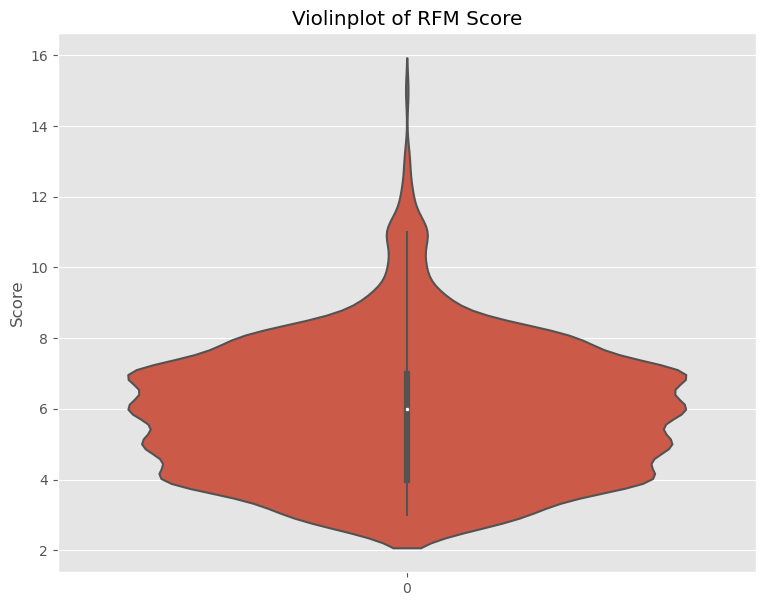

In [16]:
# Checking the distribution of RFM Score
# This should help in determining the best splitting method/parameters for the customer segmentations
plt.figure(figsize=(9, 7))
sns.violinplot(data=data['RFMScore'])
plt.title('Violinplot of RFM Score')
plt.ylabel('Score')
plt.show()

The classes need not be of equal frequency and neither do they need to be evenly spaced. 
Therefore, the cut and qcut options are not suitable for creating the customer segments. 

I will proceed to create the customer segments manually. 

I referred to these examples:

1. [Resource 1](https://www.putler.com/rfm-analysis/#A_simpler_representation)

2. [Resource 2](https://neurosys.com/blog/rfm-analysis-for-customer-segmentation)

3. [Resource 3](https://thecleverprogrammer.com/2023/06/12/rfm-analysis-using-python/)


                            Customer Segments Information
![Customer Segments Information](<attachment:Screenshot 2023-10-12 165653.png>)

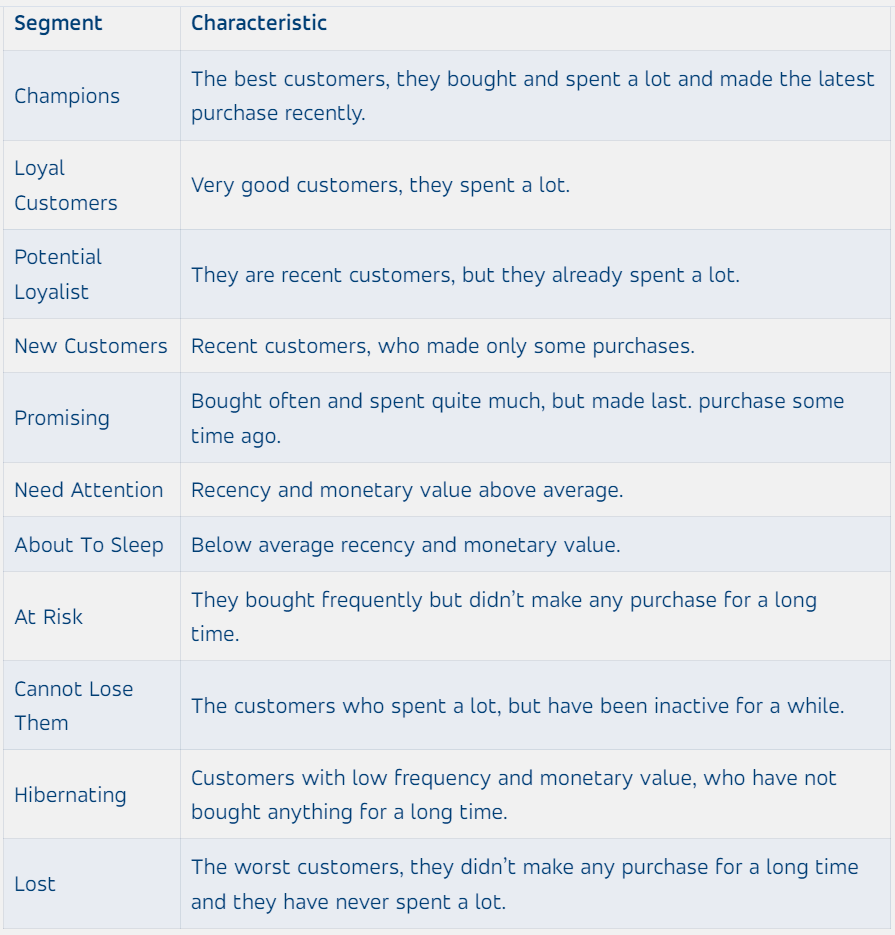

In [17]:
# Creating a new column, a sum of frequency score and monetary value score
data['FreqMonetaryScore'] = (data['FrequencyScore'] + data['MonetaryScore']) / 2

In [18]:
# Defining the customer segments
champions = (data['RecencyScore'] >= 4) & (data['FreqMonetaryScore'] >= 3.5)
loyal_customers = (data['RecencyScore'] >= 3) & (data['RecencyScore'] <= 4) & (data['FreqMonetaryScore'] >= 3)
potential_loyalist = (data['RecencyScore'] >= 2) & (data['FreqMonetaryScore'] >= 1) & (data['FreqMonetaryScore'] <= 3)
recent_customers = (data['RecencyScore'] >= 4) & (data['FreqMonetaryScore'] <= 1)
promising = (data['RecencyScore'] >= 3) & (data['RecencyScore'] <= 4) & (data['FreqMonetaryScore'] <= 1)
needing_attention = ((data['RecencyScore'] >= 2) & (data['RecencyScore'] <= 3)) & (data['FreqMonetaryScore'] >= 2) & (data['FreqMonetaryScore'] <= 3)
about_to_sleep = (data['RecencyScore'] >= 2) & (data['RecencyScore'] <= 3) & (data['FreqMonetaryScore'] <= 2)
at_risk = (data['RecencyScore'] <= 2) & (data['FreqMonetaryScore'] >= 2)
cant_lose = (data['RecencyScore'] <= 1) & (data['FreqMonetaryScore'] >= 4)
hibernating = (data['RecencyScore'] >= 1) & (data['RecencyScore'] <= 2) & (data['FreqMonetaryScore'] >= 1) & (data['FreqMonetaryScore'] <= 2)
lost = (data['RecencyScore'] < 2) & (data['FreqMonetaryScore'] < 2)

In [19]:
# Creating the customer segments column and making the records empty strings
data['CustomerSegment'] = ''

# Segmenting the data
data.loc[champions, 'CustomerSegment'] = 'champion'
data.loc[loyal_customers, 'CustomerSegment'] = 'loyal customer'
data.loc[potential_loyalist, 'CustomerSegment'] = 'potential loyalist'
data.loc[recent_customers, 'CustomerSegment'] = 'recent customer'
data.loc[promising, 'CustomerSegment'] = 'promising customer'
data.loc[needing_attention, 'CustomerSegment'] = 'customer needing attention'
data.loc[about_to_sleep, 'CustomerSegment'] = 'customer about to sleep'
data.loc[at_risk, 'CustomerSegment'] = 'at risk'
data.loc[cant_lose, 'CustomerSegment'] = "can't lose"
data.loc[hibernating, 'CustomerSegment'] = 'hibernating'
data.loc[lost, 'CustomerSegment'] = 'lost'

# Data Analysis and Visualization

**Customer behaviour Questions to Ask/Answer:**

1. What is the distribution of Customer segments?
2. What is the Customer segment constitution per RFM segment?
3. What are the top 2 market areas(location) by sales count?
4. What are the top 2 market areas by revenue?
5. What is the RFM and customer segment distribution per market area?
6. What are the top 2 products by sales count?
7.  What are the top 2 products by revenue?
8. What is the RFM and customer segment distribution per product?

Segments of interest:

-  `High Value customers` - Champions, loyal customers, can't lose
- `Already churned customers` - Lost, hibernating
- `Customers who could be saved` - At risk, customer needing attention
- `New customers` - Recent customer

**Segment Questions to Ask:**

1. What is the product distribution in the above segments?
2. What is the market constitution in the above segments?
3. What is the distribution of monetary value?

## What is the distribution of Customer segments?

In [20]:
# Checking the classes distribution
data['CustomerSegment'].value_counts()

CustomerSegment
hibernating                   217
potential loyalist            210
lost                          162
customer about to sleep       162
recent customer                89
promising customer             84
at risk                        45
customer needing attention     15
loyal customer                 10
champion                        4
can't lose                      2
Name: count, dtype: int64

<Figure size 1000x1000 with 0 Axes>

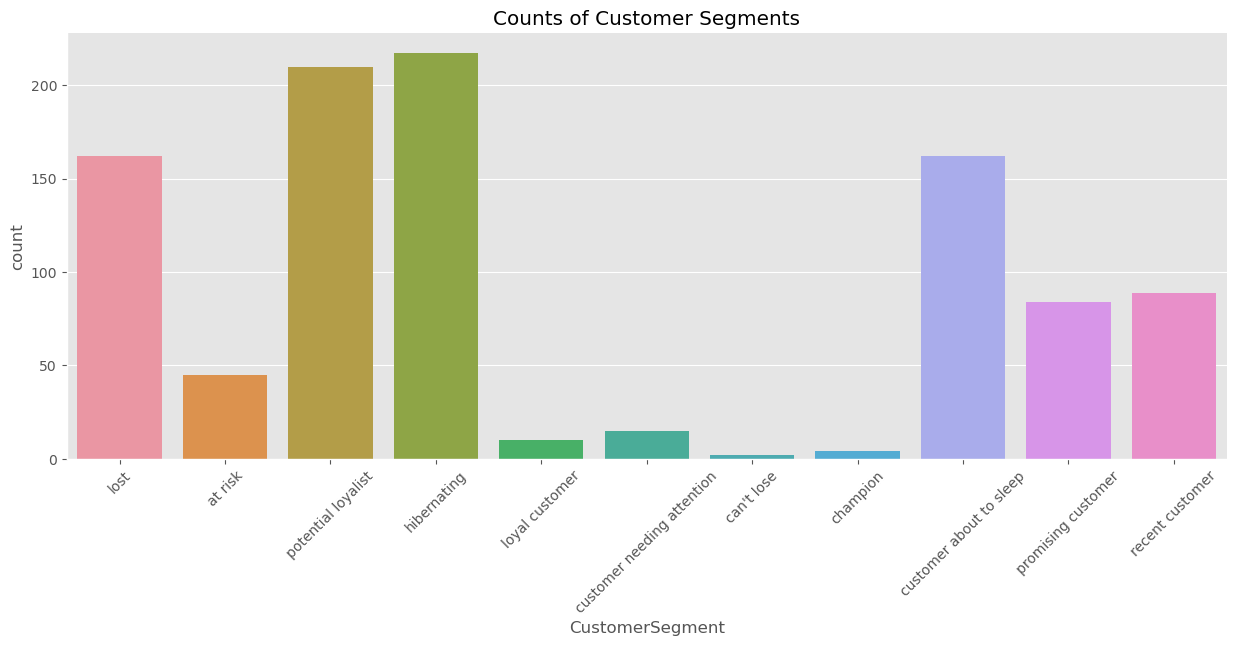

In [21]:
# Countplot of customer segments
plt.figure(figsize=(10, 10))
sns.catplot(data=data, kind='count', x='CustomerSegment', aspect=2.5)
plt.title('Counts of Customer Segments')
plt.xticks(rotation=45)
plt.show()

Hibernating customers take up the largest portion of customers. Followed by potential loyalists, then with customer about to sleep and lost which have tied.



## What is the Customer segment constitution per RFM segment?

In [22]:
# Grouping data by rfmsegment then by customer segments for further analysis
groupedByRFM = data.groupby(by=['RFMSegment', 'CustomerSegment'])['OrderID'].size().reset_index(name='Count')

In [23]:
# Using ploty to create a treemap
treemap_fig = px.treemap(data_frame=groupedByRFM, path=['RFMSegment', 'CustomerSegment'],
                         values='Count', color='RFMSegment', width=1300, height=700,
                         title='RFM segements by Customer segments'
                         )
treemap_fig.show()

## What are the top 2 market areas(location) by sales count?

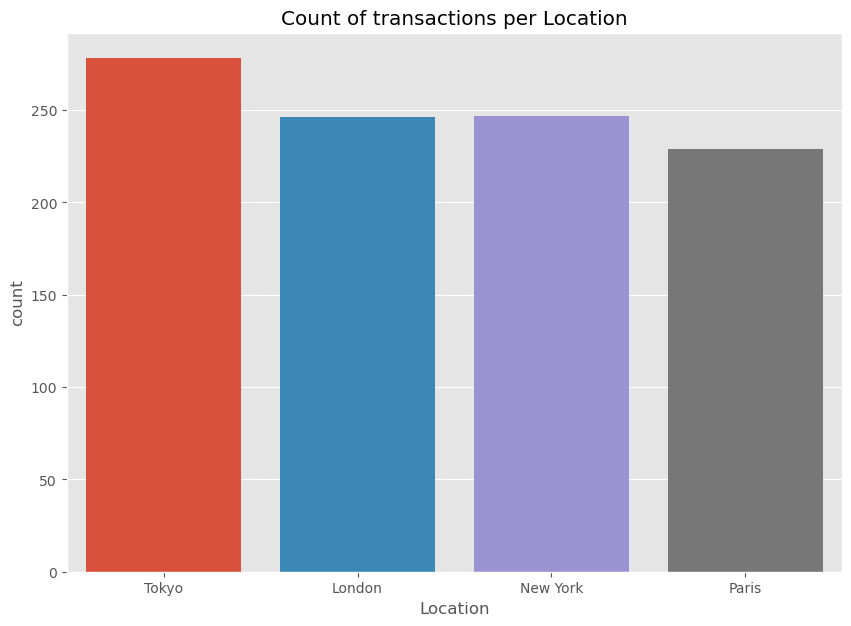

In [24]:
# Countplot of transactions per market area
plt.figure(figsize=(10, 7))
sns.countplot(data=data, x='Location', saturation=0.9)
plt.title('Count of transactions per Location')
plt.show()

## What are the top 2 market areas by revenue?

In [25]:
# Grouping data by Location to get total revenue per location
market_monetary_value = data.groupby(by='Location')['TransactionAmount'].sum().reset_index()

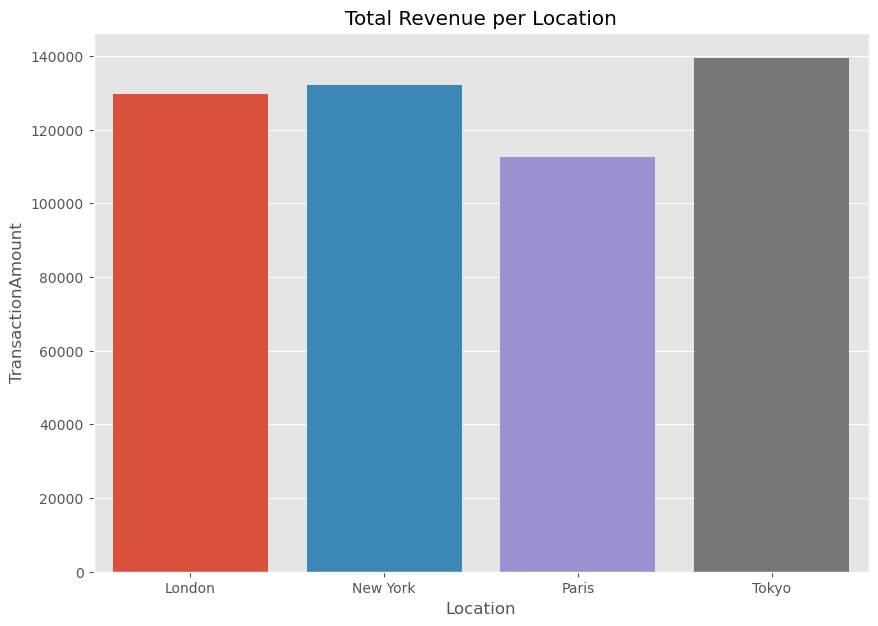

In [26]:
# Barplot of revenue per Location
plt.figure(figsize=(10, 7))
sns.barplot(data=market_monetary_value, x='Location', y='TransactionAmount', saturation=0.9)
plt.title("Total Revenue per Location")
plt.show()

## What is the RFM and customer segment distribution by market area(Location)?

In [27]:
# Grouping data by Location
market_customer_segements = data.groupby('Location')['CustomerSegment'].value_counts().reset_index()
market_RFM_segments = data.groupby('Location')['RFMSegment'].value_counts().reset_index()

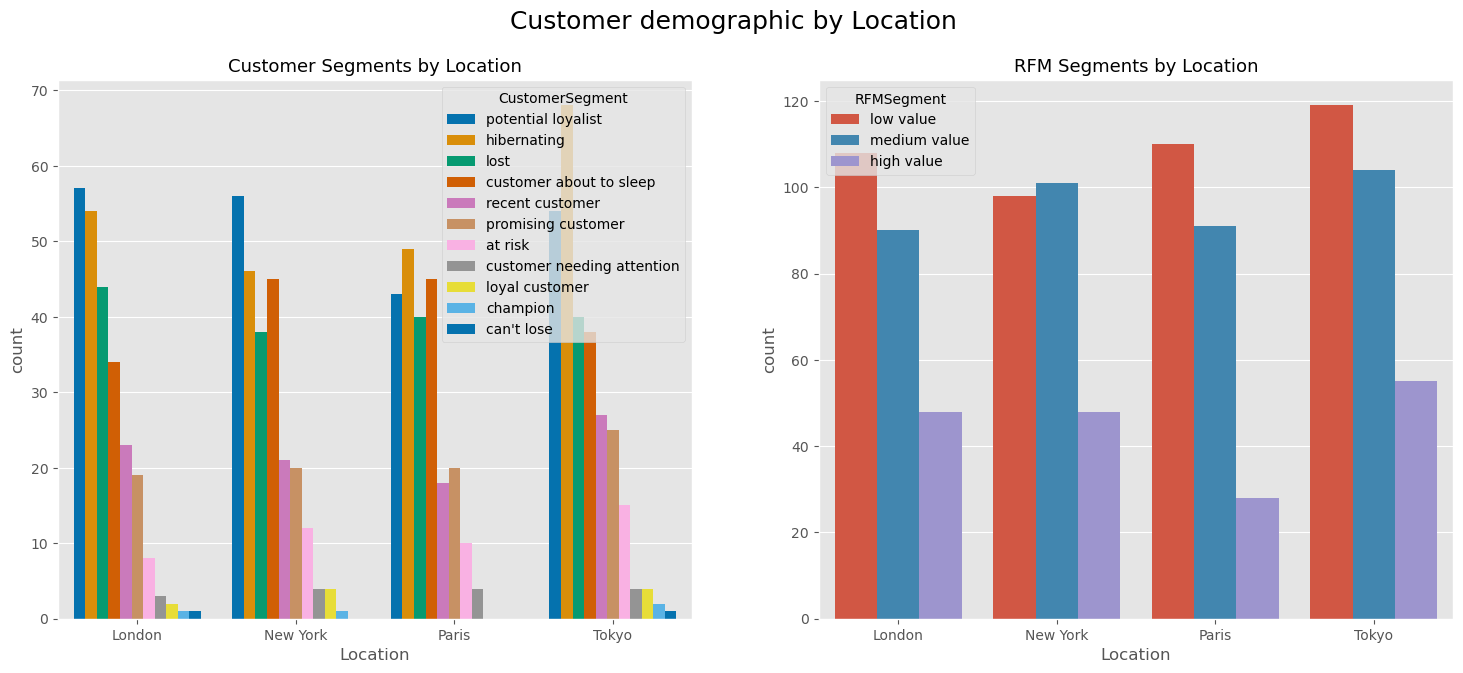

In [28]:
# Plotting the figures
fig, (ax1, ax2) = plt.subplots(figsize=(18, 7), ncols=2)
plt.suptitle("Customer demographic by Location", fontsize=18)

# Customer segments plot
sns.barplot(data=market_customer_segements, x='Location', y='count', hue='CustomerSegment', ax=ax1, saturation=0.95, palette='colorblind')
ax1.set_title("Customer Segments by Location", fontsize=13)

# RFM Segments plot
sns.barplot(data=market_RFM_segments, x='Location', y='count', hue='RFMSegment', ax=ax2, saturation=0.8)
ax2.set_title("RFM Segments by Location", fontsize=13)
plt.show()

## What are the top 2 products by sales count?

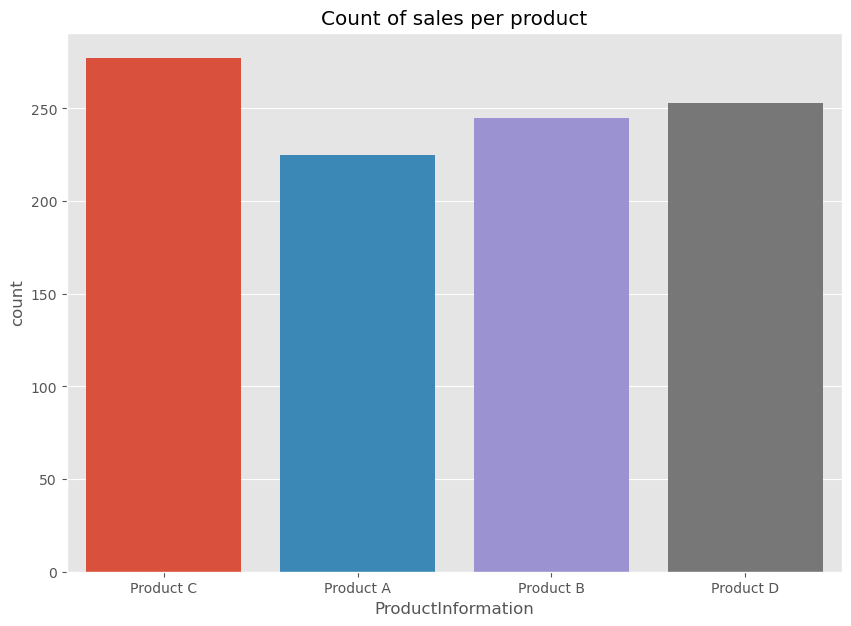

In [29]:
# Plotting product information
plt.figure(figsize=(10, 7))
sns.countplot(data=data, x='ProductInformation', saturation=0.9)
plt.title('Count of sales per product')
plt.show()

## What are the top 2 products by revenue?

In [30]:
# Grouping data by Location to get total revenue per location
product_monetary_value = data.groupby(by='ProductInformation')['TransactionAmount'].sum().reset_index()

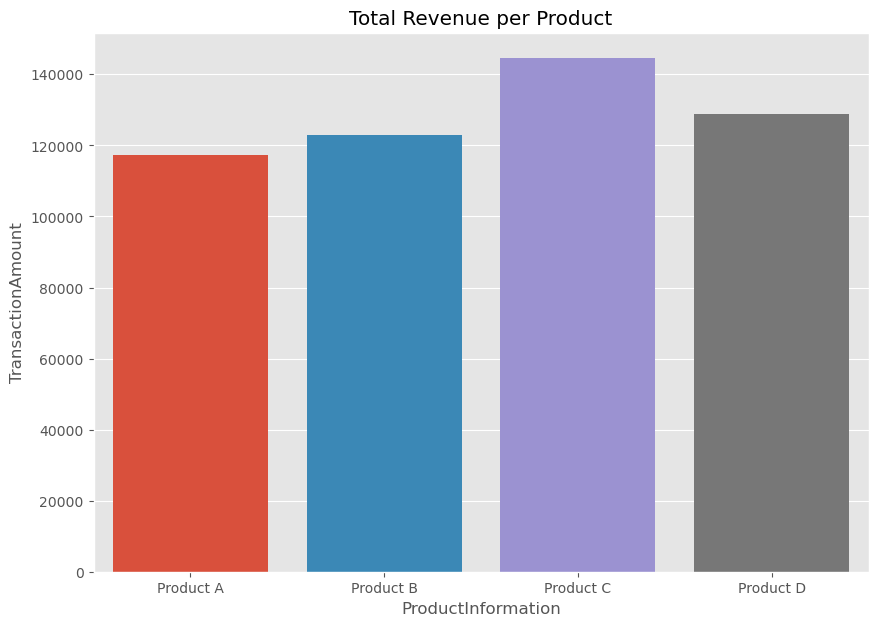

In [31]:
# Barplot of revenue per Location
plt.figure(figsize=(10, 7))
sns.barplot(data=product_monetary_value, x='ProductInformation', y='TransactionAmount', saturation=0.9)
plt.title("Total Revenue per Product")
plt.show()

## What is the RFM and Customer segment distribution by Product?

In [32]:
# Grouping data by ProductInformation
product_customer_segments = data.groupby(by='ProductInformation')["CustomerSegment"].value_counts().reset_index()
product_RFM_segments = data.groupby(by='ProductInformation')['RFMSegment'].value_counts().reset_index()

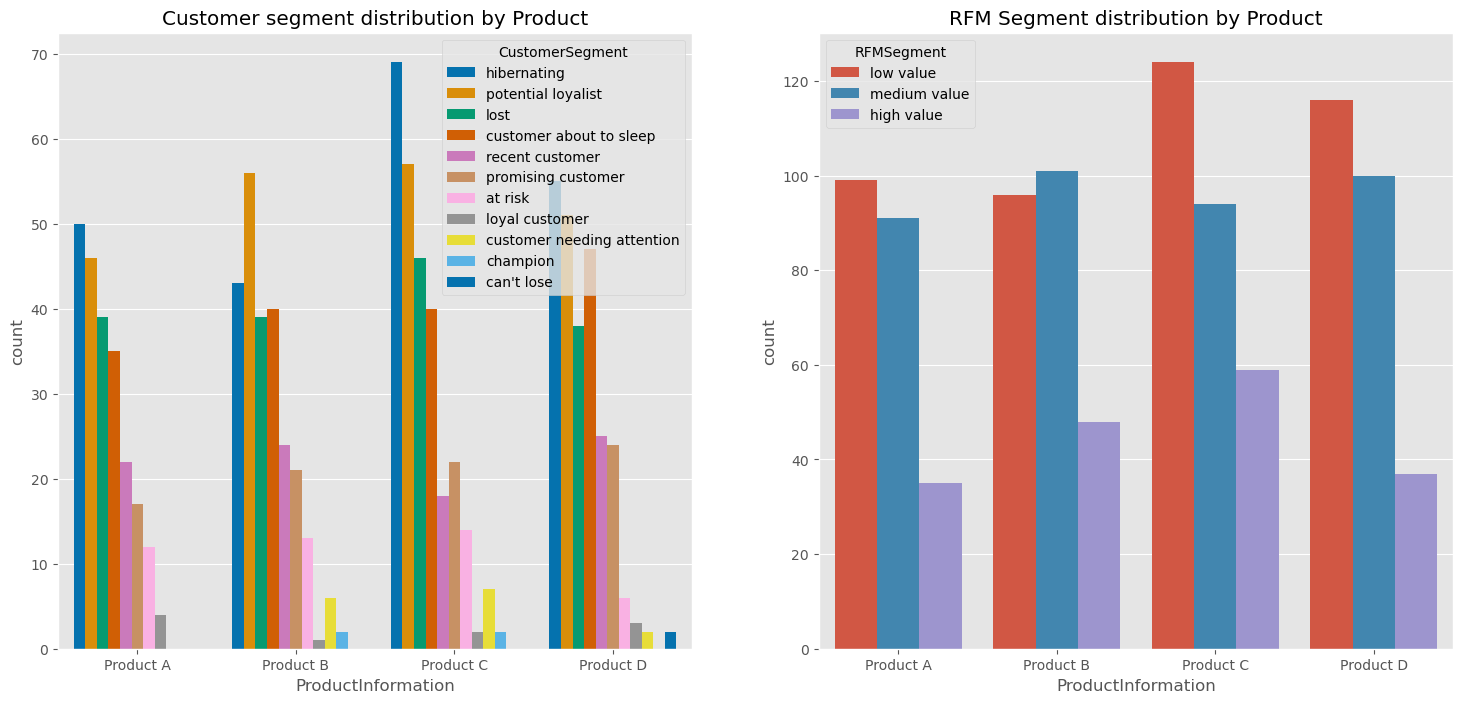

In [33]:
# Plotting customer demographic by product
fig2, (ax1, ax2) = plt.subplots(figsize=(18, 8), ncols=2)

# Product by customer segment
sns.barplot(data=product_customer_segments, x='ProductInformation', y='count', hue="CustomerSegment", saturation=0.95, ax=ax1, palette='colorblind')
ax1.set_title("Customer segment distribution by Product")

# Product by RFM Segment
sns.barplot(data=product_RFM_segments, x="ProductInformation", y="count", hue='RFMSegment', saturation=0.8, ax=ax2)
ax2.set_title("RFM Segment distribution by Product")
plt.show()